# Stock Price Prediction Problem

## Loading and Handling Data into Pandas

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [127]:
data = pd.read_csv('/home/Major_Project/Final-Data/FB.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

  symbol        date       open       high        low      close     volume  \
0     FB  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1     FB  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2     FB  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3     FB  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4     FB  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
0  38.230000       0.000000          38.230000           0.000000   
1  34.029999      -4.200001          36.129999           2.100000   
2  31.000000      -3.029999          34.419999           3.419999   
3  32.000000       1.000000          33.814999           1.814999   
4  33.029999       1.029999          33.657999           0.628000   

   s&p_index_open  s&p_index_high  s&p_index_low  s&p_index_close  \
0     1305.050049     1312.239990    1291

The code reads a CSV file named 'FB.csv' located at '/home/Major_Project/Final-Data/' using the pandas library. A pandas DataFrame object named data is created by reading the file and storing its contents in the read_csv() function from pandas.

DataFrame is then displayed using the head() function after reading the CSV file. The preview shows the column names and a small portion of the data.

To provide a section header for the output, the code prints the text "Data Types:". To display the data types of each column, it uses the dtypes attribute of the DataFrame. DataFrame columns contain numerical values, strings, or other types of data, indicating whether each column contains numerical values or strings.

This code loads a CSV file into a pandas DataFrame, displays the first few rows of data, and displays information about the data types of the columns.

Reading as datetime format:

In [128]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv('/home/Major_Project/Final-Data/FB.csv', parse_dates='date', \
                   index_col='date',date_parser=dateparse)
print data.head()

           symbol       open       high        low      close     volume  \
date                                                                       
2012-05-18     FB  42.049999  45.000000  38.000000  38.230000  573576400   
2012-05-21     FB  36.529999  36.660000  33.000000  34.029999  168192700   
2012-05-22     FB  32.610001  33.590000  30.940001  31.000000  101786600   
2012-05-23     FB  31.370001  32.500000  31.360001  32.000000   73600000   
2012-05-24     FB  32.950001  33.209999  31.770000  33.029999   50237200   

            adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
date                                                                         
2012-05-18  38.230000       0.000000          38.230000           0.000000   
2012-05-21  34.029999      -4.200001          36.129999           2.100000   
2012-05-22  31.000000      -3.029999          34.419999           3.419999   
2012-05-23  32.000000       1.000000          33.814999           1.814999   

This code defines a lambda function named dateparse that converts a string representing a date into a datetime object using the strptime() function from the datetime module in pandas. A date in the format 'YYYY-MM-DD' is represented by the input string '%Y-%m-%d'.

It then reads a CSV file named 'FB.csv' located at '/home/Major_Project/Final-Data/'. The file is read using the pandas function read_csv(). The read_csv() function takes three arguments:

parse_dates='date' indicates that the 'date' column in the CSV file should be parsed as dates rather than simple strings.
index_col='date' specifies that the 'date' column should be used as the index of the resulting DataFrame. This means that the DataFrame will be indexed by the dates instead of default numerical indices.
date_parser=dateparse specifies the custom date parsing function to be used. In this case, it uses the dateparse lambda function defined earlier.
Using the head() function, the code prints the first few rows of the resulting DataFrame. The preview includes the column names, the parsed date values as the index, and a subset of the actual data.

In [129]:
#check datatype of index
data.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-05-18, ..., 2016-03-08]
Length: 956, Freq: None, Timezone: None

In a DataFrame named data, this code checks the data type of the index. DataFrame rows are indexed by their labels or identifiers.

This code retrieves the index object from the DataFrame by calling data.index. Each row in the DataFrame has an index value represented by this object. The purpose of this code is to determine the index's data type.

As a result of this code, the data type of the index will be displayed. Integers, strings, dates, and timestamps are all data types supported by pandas. A DataFrame's data type can be used to gain insight into its structure and organization.

In [130]:
#convert to time series:
ts = data['adj_close']
ts.head(10)

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
Name: adj_close, dtype: float64

DataFrame column data is converted into a time series object, and the first ten values of the time series are displayed.

Assigning the column with the label 'adj_close' to a new variable called ts, the line ts = data['adj_close'] selects the column from the DataFrame with the label 'adj_close'. It is assumed that this column contains data about the adjusted closing prices of a stock or another financial instrument.

To display the first 10 values of the time series, the line ts.head(10) extracts the 'adj_close' column and assigns it to ts. Pandas' head() method returns a number of rows from a Series or DataFrame's beginning.

This code creates a time series by converting a specific column from a DataFrame. After that, the first 10 values of the time series are shown, giving a glimpse of historical adjusted closing prices.

### Indexing TS arrays:

In [131]:
#1. Specific the index as a string constant:
ts['2012-05-18']

38.229999999999997

Based on an index value, this code accesses a specific value from a time series object, ts.

Within square brackets, the line ts['2012-05-18'] specifies the index value '2012-05-18'. It is assumed that this index value represents a date or timestamp.

The purpose of this code is to retrieve the value from the time series ts that corresponds to the specified index value, in this case May 18, 2012.

This code retrieves a specific value from a time series object by specifying the index value as a string constant.

In [132]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2015, 3, 26)]

83.010002

The following code snippet performs the following actions:

A datetime class is imported from the datetime module in the Python standard library. This class provides functionality for manipulating and representing dates and times.

This line creates a datetime object representing March 26, 2015 by utilizing the datetime function. The datetime object is constructed by passing the year, month, and day as arguments.

The purpose of this code is to access a specific value from the time series TS using the datetime object. It retrieves the value in the time series corresponding to the specified date by indexing ts with the datetime object.

A datetime object representing a specific date is created by importing the datetime class, and then a value is retrieved from a time series using this datetime object.

#Get range:

In [133]:
#1. Specify the entire range:
ts['2012-05-18':'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

With this code snippet, you can specify a specific range of values from a time series object, ts, based on its index values.

Within square brackets, ts['2012-05-18':'2015-03-26'] specifies an index range. Ranges are defined by providing start and end dates in the format 'YYYY-MM-DD'.

A subset of values within a given date range will be extracted from the time series ts using this code. To retrieve all values from May 18, 2012, through March 26, 2015, it aims to retrieve all values from May 18, 2012, through March 26, 2015.

With this code, you can extract a specific range of values from a time series by specifying the start and end dates.

In [134]:
#2. Use ':' if one of the indices is at ends:
ts[:'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

This code snippet specifies a range of values from the beginning of a time series object, ts, up to a specific index value.

Within square brackets, the line ts[:'2015-03-26'] specifies that the range starts from the first index value of the time series and ends at the specified index value ('2015-03-26').

In this code, all values up to, but not including, the specified index value are to be retrieved from the time series ts. As a result, it retrieves all values from the beginning of the time series up until March 26, 2015.

By utilizing the colon operator within square brackets, this code extracts values from the start of a time series to a specified index value.

Note: ends included here

In [135]:
#All rows of 1962:
ts['2012']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2012-12-10    27.840000
2012-12-11    27.980000
2012-12-12    27.580000
2012-12-13    28.240000
2012-12-14    26.809999
2012-12-17    26.750000
2012-12-18    27.709999
2012-12-19    27.410000
2012-12-20    27.360001
2012-12-21    26.260000
2012-12-24    26.930000
2012-12-26    26.510000
2012-12-27    26.049999
2012-12-28    25.910000
2012-12-31    26.620001
Name: adj_close, Length: 155

In the time series object, ts, this code snippet accesses all rows from a specific year.

Within square brackets, ts['2012'] uses the year ('2012') as an index value to retrieve all the rows corresponding to that year.

It is intended to extract a subset of values from the time series ts that pertain to a particular year using this code. Specifically, it aims to retrieve all 2012 rows.

By specifying the desired year as an index value, this code retrieves all rows from a specific year within a time series.

# Checking for stationarity

## Plot the time-series

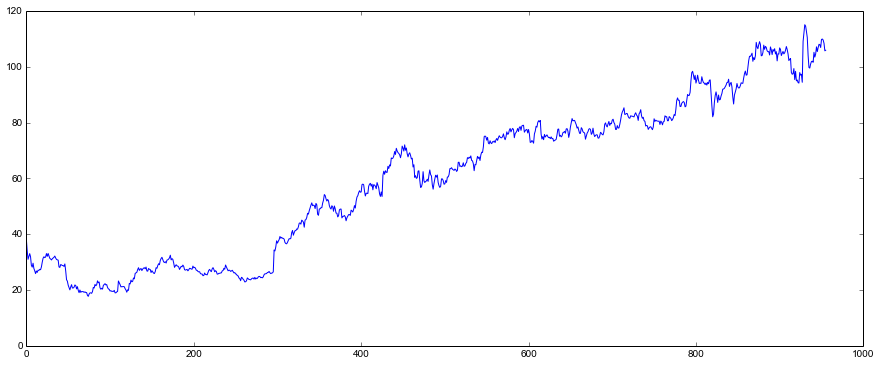

In [136]:
plt.plot(ts)

A line plot of the values in a time series object, ts, is created using the plot() function in the matplotlib.pyplot library.

A graph is generated by plt.plot(ts). On the x-axis are the index values of the time series (e.g., dates or timestamps), and on the y-axis are the values of ts.

Data in the time series will be visualized using this code to reveal trend and patterns. This graph illustrates the changes in values over time.

By displaying the data as a line plot, we can identify any patterns or trends that exist in the series and visualize the data.

### Function for testing stationarity

In [137]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

This code contains a function called test_stationarity that tests a given time series' stationarity.

Adfuller is assumed to be imported from statsmodels.tsa.stattools.

An analysis of time series data is performed with the test_stationarity function using the timeseries parameter.

The function contains the following:

From the pandas library, rolling statistics are calculated using rolling_mean and rolling_std functions. Window specifies how large the rolling window should be, in this case 20.
The rolling mean (in red) and rolling standard deviation (in black) are visualized in a plot.
A Dickey-Fuller test is performed using the adfuller function. Time series are tested for stationaryness with this test. DFtest stores the test results.
With the print statement, the test results, including test statistics and critical values, are displayed. A test result is stored and formatted using the dfoutput variable.
The code provides a function for calculating rolling statistics and conducting Dickey-Fuller tests to determine whether a time series is stationary. It analyzes the opening price, high price, volatility over 10 days, and moving average over 50 days of the time series.

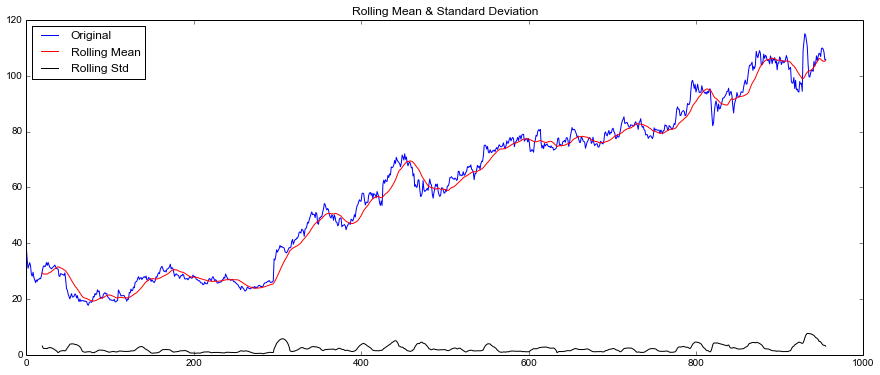

Results of Dickey-Fuller Test:
open                     -0.026673
high                      0.956270
10_day_volatility         6.000000
50_day_moving_avg       949.000000
Critical Value (5%)      -2.864590
Critical Value (1%)      -3.437259
Critical Value (10%)     -2.568394
dtype: float64


In [138]:
test_stationarity(ts)

In this code snippet, a time series object, ts, is passed as an argument to the test_stationarity function.

When test_stationarity(ts) is executed, the function defined earlier will be invoked and perform the following steps:

Ts time series are calculated with a window size of 20 to determine the rolling mean and rolling standard deviation.
Show the rolling mean in red, the rolling standard deviation in black, and the original time series in blue.
To visualize rolling standard deviation and rolling mean, show the plot.
Test the stationarity of the ts time series using the Dickey-Fuller test.
Provide a printout of the Dickey-Fuller test results, including test statistics, critical values, and other statistics.
To assess the stationarity of the ts series, call test_stationarity(ts) to apply a series of statistical tests and visualizations.

# Making Data Stationary


## Estimating & Eliminating Trend


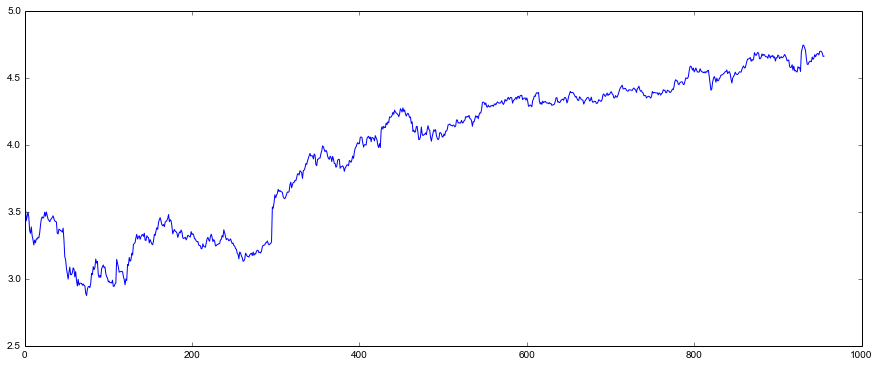

In [139]:
ts_log = np.log(ts)
plt.plot(ts_log)

In this code snippet, the logarithm of the values of a time series, ts, is taken and the resulting transformed series is plotted.

To each value of the ts time series, ts_log = np.log(ts) applies the natural logarithm function from the numpy library (np.log()). A new variable called ts_log is created from the transformed series.

In the next line, plt.plot(ts_log) uses the plot() function from the Matplotlib library to plot the transformed series (ts_log). The logarithmically transformed time series are shown in this plot.

With this code, we are aiming to visualize the changes in the data distribution and any potential trends. Logarithms can stabilize variances or amplify small changes.

It plots the transformed series to observe any patterns or changes in the data that may be apparent after taking the logarithm of a time series and assigning it to a new variable (ts_log).

## Smoothing:

### Moving average

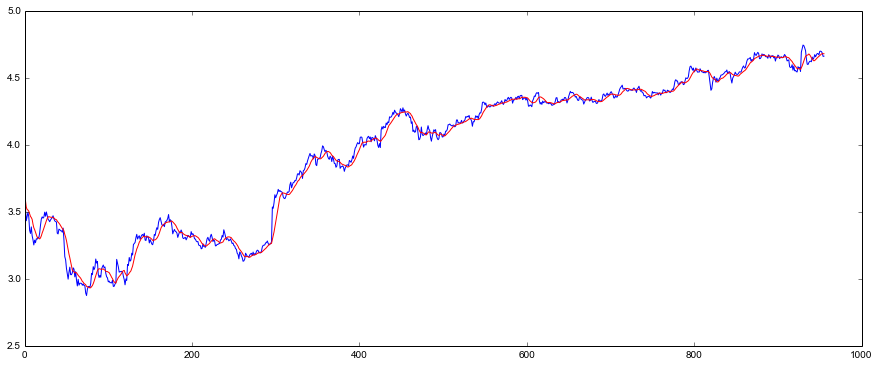

In [140]:
moving_avg = pd.rolling_mean(ts_log, 10, min_periods=1)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Using this code snippet, the moving average is calculated for a logarithmically transformed time series, ts_log, and the original series is plotted along with the moving average.

Using moving_avg = pd.rolling_mean(ts_log, 10, min_periods=1), the moving average of the ts_log time series can be calculated. With min_periods=1, even if there are fewer than 10 data points, the moving average is still computed with a rolling window of size 10.

Plotting the original logarithmically transformed data series (ts_log) is then created using plt.plot(ts_log).

Plotting the moving average series on the same plot with color 'red' follows plt.plot(moving_avg, color='red').

The purpose of this code is to visualize the original time series as well as its corresponding moving average. Data trends can be identified and short-term fluctuations can be smoothed out with the moving average.

The code calculates the moving average of a logarithmically transformed time series and plots both the original and moving average to visualize the data and underlying trends.

In [141]:
print moving_avg

date
2012-05-18    3.643621
2012-05-21    3.585432
2012-05-22    3.534950
2012-05-23    3.517647
2012-05-24    3.513600
2012-05-25    3.505154
2012-05-29    3.484669
2012-05-30    3.466457
2012-05-31    3.457714
2012-06-01    3.444158
2012-06-04    3.409009
2012-06-05    3.381593
2012-06-06    3.367072
2012-06-07    3.347493
2012-06-08    3.327705
...
2016-02-17    4.641914
2016-02-18    4.633378
2016-02-19    4.627872
2016-02-22    4.630797
2016-02-23    4.636364
2016-02-24    4.643479
2016-02-25    4.650245
2016-02-26    4.655975
2016-02-29    4.660676
2016-03-01    4.668446
2016-03-02    4.672862
2016-03-03    4.678599
2016-03-04    4.682187
2016-03-07    4.680844
2016-03-08    4.681288
Length: 956


In this code snippet, the moving average values calculated in the previous step are displayed.

A moving average series is displayed by printing moving_avg. Moving_avg values are output to the console with the print statement.

This code is intended to examine the calculated moving average values for further analysis or inspection.

The code displays the moving average values in the console or output window, allowing you to view the calculated moving average values.

In [142]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
2012-05-25   -0.042234
2012-05-29   -0.122906
2012-05-30   -0.127489
2012-05-31   -0.069940
2012-06-01   -0.122004
2012-06-04   -0.116882
2012-06-05   -0.128509
2012-06-06   -0.078297
2012-06-07   -0.077544
2012-06-08   -0.028171
dtype: float64

In this code snippet, the difference between logarithmically transformed time series, ts_log, and moving average series, moving_avg, is calculated, and the first 15 values of the resulting difference series are displayed.

This line calculates the element-wise difference between the ts_log series and the moving_avg series by dividing ts_log by moving_avg. Each index position is subtracted by this operation.

As a result, the first 15 values of the difference series are displayed in the line ts_log_moving_avg_diff.head(15). Dataframes or series can be retrieved by using the head() function in Pandas.

The purpose of this code is to examine the differences between the logarithmically transformed and moving average series. Identifying potential patterns or anomalies in the data can help provide insight into deviations from the average trend.

The code calculates the difference between the logarithmically transformed series and the moving average series, and then displays the first 15 values of the difference series to analyze the deviations.

In [143]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
dtype: float64

Using this code snippet, we remove any missing or NaN (Not a Number) values from the time series called ts_log_moving_avg_diff and display the first few values.

In the ts_log_moving_avg_diff series, the line ts_log_moving_avg_diff.dropna(inplace=True) removes any rows that contain missing or NaN values. In Pandas, the dropna() function is used to drop rows or columns with missing values. The inplace=True parameter ensures that the modifications are directly applied to the ts_log_moving_avg_diff series.

The following line displays the first few values of the modified series, ts_log_moving_avg_diff.head(). Head() retrieves the first five rows from the series beginning at the beginning.

Using this code, missing or NaN values will be removed from the difference series, and the resulting series will be examined.

This code removes missing or NaN values from the difference series and displays the first few values of the modified series, allowing for further analysis or visualization.

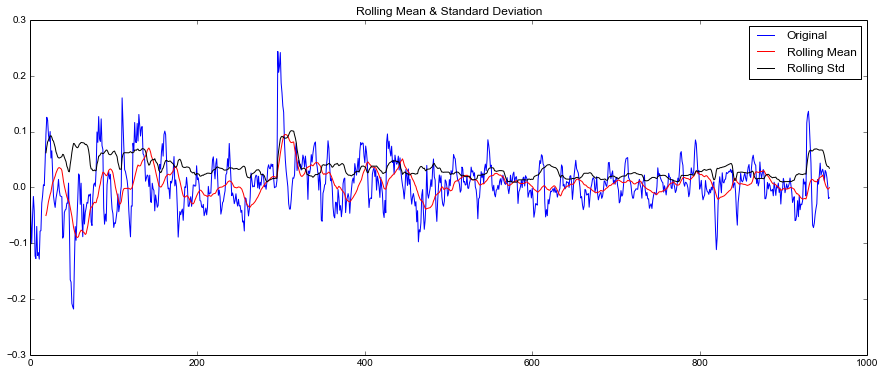

Results of Dickey-Fuller Test:
open                   -9.977879e+00
high                    2.153365e-17
10_day_volatility       5.000000e+00
50_day_moving_avg       9.500000e+02
Critical Value (5%)    -2.864587e+00
Critical Value (1%)    -3.437252e+00
Critical Value (10%)   -2.568392e+00
dtype: float64


In [144]:
test_stationarity(ts_log_moving_avg_diff)

To determine stationarity, the code snippet calls the test_stationarity function and compares the logarithmically transformed series with the moving average series, ts_log_moving_avg_diff.

Upon executing test_stationarity(ts_log_moving_avg_diff), the function defined earlier will be invoked and the following steps will be performed:

The rolling mean and rolling standard deviation of the ts_log_moving_avg_diff time series should be calculated.
Put the rolling mean in red, the rolling standard deviation in black, and the original time series (ts_log_moving_avg_diff) in blue.
Visualize the rolling mean and rolling standard deviation of the difference series with the plot.
Test the stationarity of the ts_log_moving_avg_diff time series using the Dickey-Fuller test.
The Dickey-Fuller test results, including the test statistic, critical values, and other statistics, should be printed.
By subtracting the moving average from the logarithmically transformed series, test_stationarity(ts_log_moving_avg_diff) assesses the stationarity of the difference series.

### Exponentially Weighted Moving Average

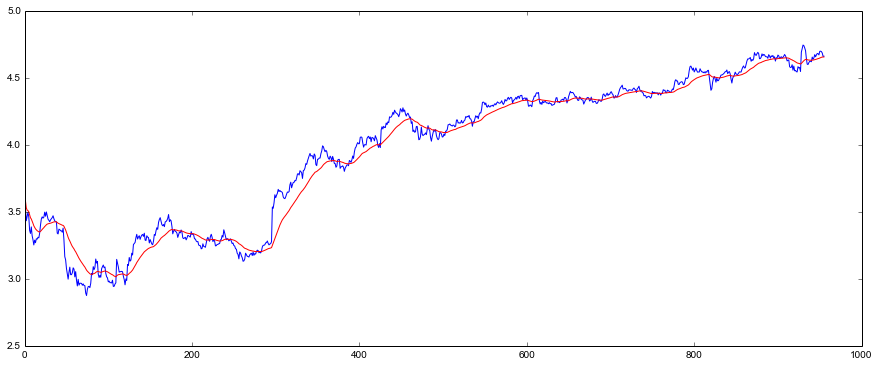

In [145]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

It plots both the original series and the exponentially weighted moving average (EWMA) of a logarithmically transformed time series, ts_log.

Using a halflife of 12, expwighted_avg = pd.ewma(ts_log, halflife=12) calculates the EWMA of the ts_log time series. The halflife parameter determines the period or window during which weights decrease exponentially.

Plotting the logarithmically transformed series (ts_log) using plt.plot(ts_log) results in a line plot.

Using the line plt.plot(expwighted_avg, color='red'), we plot the EWMA series on the same plot.

Last but not least, there is a commented line # expwighted_avg.plot(style='k--'). An alternative plotting style (dash black line) is shown with this line. The comment out will prevent it from being executed, however.

The purpose of this code is to visualize the original time series and its exponentially weighted moving average. With the EWMA, recent values can be given more weight, providing a smoothed representation of the data.

The code calculates a logarithmically transformed time series exponentially weighted moving average and plots the original series and the exponentially weighted moving average in order to visualize the data.

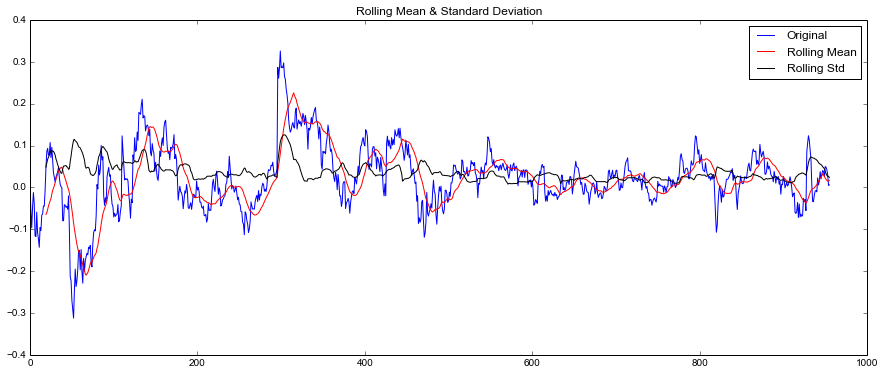

Results of Dickey-Fuller Test:
open                     -5.193435
high                      0.000009
10_day_volatility         0.000000
50_day_moving_avg       955.000000
Critical Value (5%)      -2.864571
Critical Value (1%)      -3.437216
Critical Value (10%)     -2.568384
dtype: float64


In [146]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

The purpose of this code snippet is to calculate the difference between the logarithmically transformed time series, ts_log, and the exponentially weighted moving average (EWMA) series, expwighted_avg. The test_stationarity function is then used to assess the stationarity of the resulting difference series.

By dividing the ts_log series by the expwighted_avg series, the line ts_log_ewma_diff calculates the element-wise difference between the two series. At each position of the index, the corresponding value is subtracted.

Using the test_stationarity function, the line test_stationarity(ts_log_ewma_diff) determines whether the ts_log_ewma_diff series is stationary. As part of the function, rolling statistics are calculated, the original series, rolling mean, and rolling standard deviation are plotted, and the Dickey-Fuller test is conducted.

Using this code, we will analyze the difference between logarithmically transformed and exponentially weighted moving averages. In order to determine any trends or patterns in the data, we examine the difference series, ts_log_ewma_diff, for stationarity.

This code calculates the difference between logarithmically transformed and exponentially weighted moving average series and assesses their stationarity.

## Eliminating Trend and Seasonality

### Differencing:

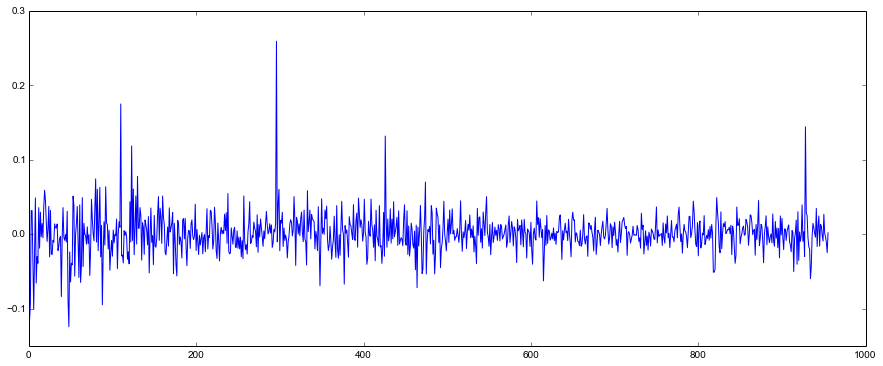

In [147]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In this code snippet, the first difference of a logarithmically transformed time series, ts_log, is calculated and plotted.

Ts_log_diff = ts_log - ts_log.shift() calculates the difference between each value in the ts_log series and the previous value. Using the shift() function, each value in the series is aligned with its preceding value. Using this operation, you can calculate the difference or change between consecutive values.

Following that, the matplotlib plot() function is used to create a line plot of the resulting differenced series, ts_log_diff. The values of the differenced series are shown on this plot.

It is intended to observe the change between consecutive values in the logarithmically transformed series by using this code. As a result of taking the first difference, we can remove trends or seasonality, focusing on data changes or fluctuations.

The code calculates the first difference in a logarithmically transformed time series and plots the resulting differenced series to examine changes between consecutive values.

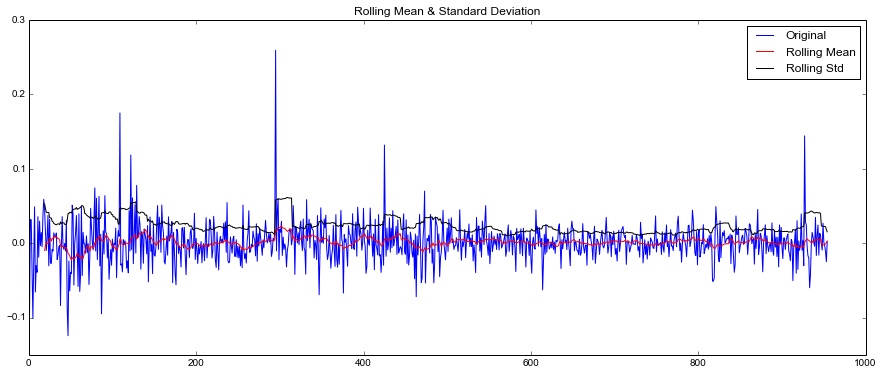

Results of Dickey-Fuller Test:
open                    -30.458521
high                      0.000000
10_day_volatility         0.000000
50_day_moving_avg       954.000000
Critical Value (5%)      -2.864574
Critical Value (1%)      -3.437223
Critical Value (10%)     -2.568386
dtype: float64


In [148]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In this code snippet, missing or NaN values are removed from a differenced time series, ts_log_diff, and the test_stationarity function is used to evaluate the differenced series' stationarity.

In the ts_log_diff series, the line ts_log_diff.dropna(inplace=True) removes any rows containing missing or NaN values. Dropping a row or column with missing values can be accomplished using the dropna() function in Pandas. Modifications to ts_log_diff are made directly to the series by using the inplace=True parameter.

In the next line, test_stationarity(ts_log_diff) evaluates the stationarity of the cleaned differenced series, ts_log_diff, using the test_stationarity function. Rolling statistics are calculated, plotted, as well as the Dickey-Fuller test is conducted using this function.

A stationarity assessment is performed by removing any missing or NaN values from the differenced series. In this way, it is possible to determine whether there are any persisting trends or patterns in the differenced series.

Summary: The test_stationarity function is used to assess the stationarity of cleaned time series after removing missing or NaN values.

### Decomposition:

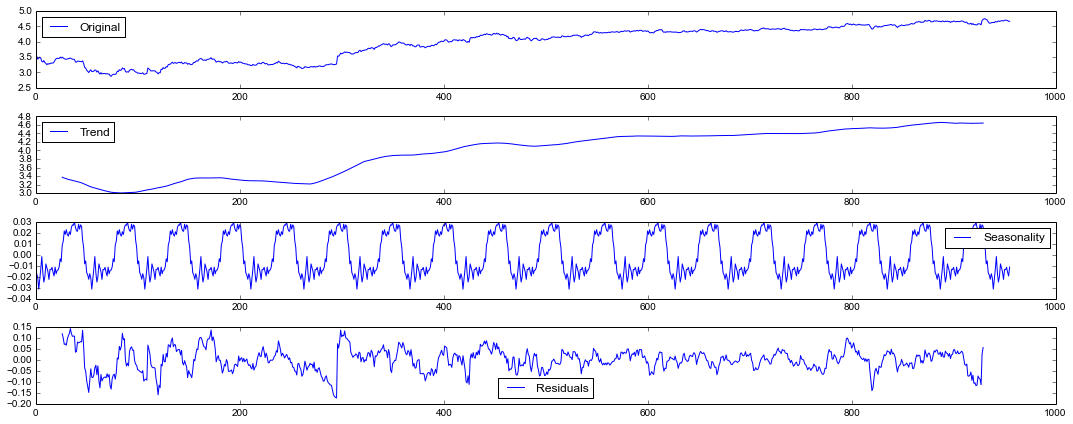

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Using this code snippet, we decompose ts_log into trend, seasonality, and residual components, and plot their results.

This line imports seasonal_decompose from statsmodels.tsa.seasonal, which is part of statsmodels.tsa.seasonal. A time series can be decomposed into trends, seasonality, and residuals by using this function.

Line decomposition = seasonal_decompose(ts_log, freq=52) applies seasonal decomposition to the ts_log series with a frequency of 52. Seasonal observations are specified by the frequency parameter. Based on this assumption, it assumes seasonality on a weekly basis.

From the decomposition object, the lines trend = decomposition.trend, seasonal = decomposition.seasonal, and residual = decomposition.resid extract the trend, seasonal, and residual components.

Following that, a series of subplot plots are created to visualize the original series, trend, seasonality, and residuals. The position of each subplot within the grid is specified by plt.subplot().

Each subplot contains:

Using the appropriate data (ts_log, trend, seasonality, or residuals), plt.plot() plots the respective component (original, trend, seasonality, or residuals).
A legend indicating the label of each component is added to the plot using plt.legend(loc='best').
To prevent overlapping, plt.tight_layout() adjusts the spacing between subplots.
Using this code, the original time series will be decomposed into its different components (trend, seasonality, and residuals) and visualized separately.

This code performs seasonal decomposition of a logarithmically transformed time series and plots the original series, trend, seasonality, and residuals in separate subplots to uncover underlying patterns and components.

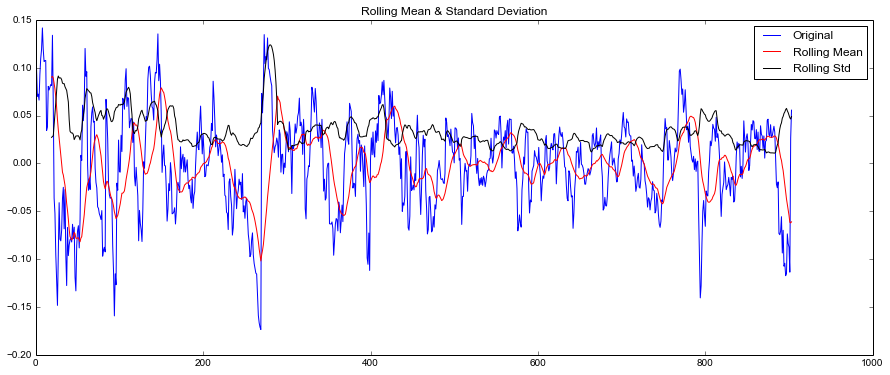

Results of Dickey-Fuller Test:
open                   -7.820168e+00
high                    6.703107e-12
10_day_volatility       7.000000e+00
50_day_moving_avg       8.960000e+02
Critical Value (5%)    -2.864771e+00
Critical Value (1%)    -3.437669e+00
Critical Value (10%)   -2.568490e+00
dtype: float64


In [150]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Using the test_stationarity function, this code snippet assesses the stationarity of the residual series obtained from the seasonal decomposition of a logarithmically transformed time series, ts_log.

In the line ts_log_decompose = residual, the residuals obtained from the seasonal decomposition are assigned to a new variable ts_log_decompose. As a result of this residual analysis, we can determine what part of the data cannot be explained by trend or seasonality.

The line ts_log_decompose.dropna(inplace=True) then removes any missing or NaN values from ts_log_decompose. With dropna(), missing values can be dropped from rows or columns in Pandas. Using the inplace=True parameter ensures that the modifications are made directly to the ts_log_decompose series.

Last but not least, test_stationarity(ts_log_decompose) evaluates the stationarity of the cleaned residual series, ts_log_decompose, using the test_stationarity function. As part of the function, rolling statistics are calculated, the original series is plotted, the rolling mean and rolling standard deviation are calculated, and the Dickey-Fuller test is performed.

A stationarity analysis will be performed by using this code by analyzing the residuals generated by seasonal decomposition. In addition to trends and seasonality, residuals capture remaining variations in data.

With this code, residuals from the seasonal decomposition are assigned to a new series, missing values are removed, and finally, the test_stationarity function is used to assess their stationarity.

# Final Forecasting

In [151]:
from statsmodels.tsa.arima_model import ARIMA

The code snippet imports the ARIMA (Autoregressive Integrated Moving Average) model class from statsmodels.tsa.arima_model.

We can access the ARIMA time series analysis functionality by importing ARIMA from statsmodels.tsa.arima_model. In the analysis of time series data with both autoregressive and moving average components, ARIMA is a popular model.

We gain access to methods and functions necessary to fit an ARIMA model to a time series, estimate its parameters, and make predictions by importing the ARIMA model class.

For time series analysis and forecasting, this code imports the ARIMA model class from statsmodels.tsa.arima_model.

### ACF & PACF Plots

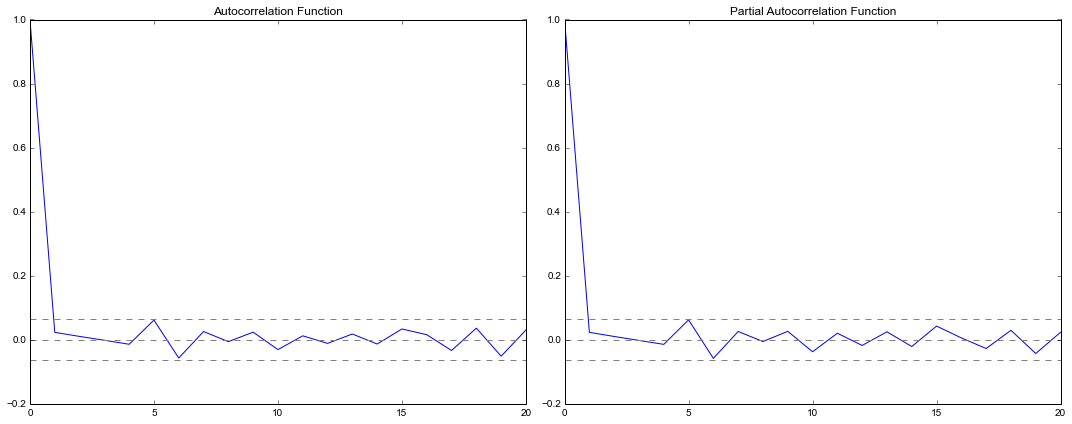

In [152]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The code snippet plots the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for a differenced time series, ts_log_diff.

Statsmodels.tsa.stattools imports the necessary functions acf and pacf from statsmodels.tsa.stattools. A time series' autocorrelation and partial autocorrelation coefficients are computed using these functions.

In the following line, lag_acf = acf(ts_log_diff, nlags=20) calculates the ACF coefficients for the differenced series ts_log_diff. This parameter specifies how many lags should be included in the computation.

The line lag_pacf = pacf(ts_log_diff, nlags=20, method='ols') also computes the PACF coefficients for the differenced series, considering a maximum lag of 20. In order to estimate the PACF, the method='ols' parameter specifies that the ordinary least squares (OLS) method should be used.

ACF and PACF are then plotted by the code.

For the ACF plot:

The subplot's position within the grid is specified by plt.subplot(121).
In plt.plot(lag_acf), the coefficients of the ACF are plotted.
To indicate confidence intervals, plt.axhline() adds horizontal lines at y=0, y=-1.96/sqrt(N), and y=1.96/sqrt(N).
The title of the ACF plot is set by plt.title('Autocorrelation Function').
For the PACF plot:

The position of the subplot within the grid is specified by plt.subplot(122).
The PACF coefficients are plotted using plt.plot(lag_pacf).
plt.axhline() adds the same horizontal lines as in the ACF plot.
For the PACF plot, plt.title('Partial Autocorrelation Function') is used.
To avoid overlapping, plt.tight_layout() adjusts the spacing between subplots.

The purpose of this code is to visualize the ACF and PACF coefficients to gain insights into autocorrelation and partial autocorrelation patterns.

It provides information on the autocorrelation and partial autocorrelation structures of a differenced time series by calculating and plotting ACF and PACF coefficients.

### AR Model:

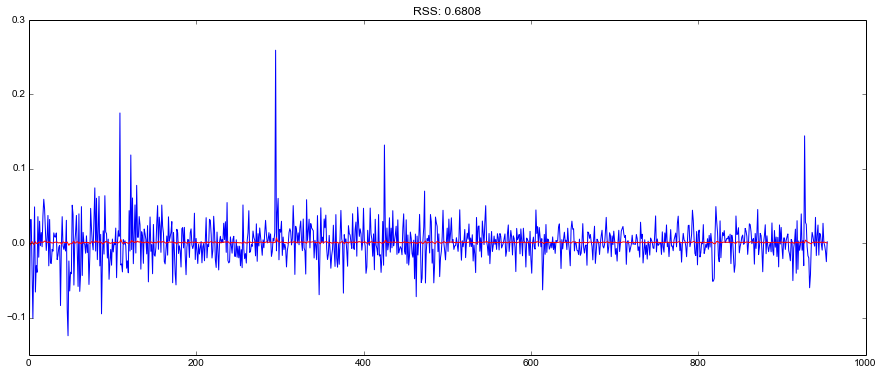

In [153]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

This code snippet fits an ARIMA model of order (2, 1, 0) to a logarithmically transformed time series, ts_log, and visualizes the fitted values and the original differenced series.

Line model = ARIMA(ts_log, order=(2, 1, 0)) creates an ARIMA model object with an order of (2, 1, 0). In other words, it is an autoregressive model of order 2 (AR(2)) applied to differenced series of order 1 (I(1)).

Afterward, results_AR = model.fit(disp=-1) fits the ARIMA model to the logarithmically transformed time series. As a result of the fit() method, the model parameters, including the autoregressive coefficients, are estimated and the results of the fitted model are returned.

The next line plots the original differenced series with plt.plot(ts_log_diff).

Plotting the fitted values obtained from the ARIMA model is performed by plt.plot(results_AR.fittedvalues, color='red'). Based on the model parameters and the original series, these values represent the predicted values.

Plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2)) sets the plot's title to display the residual sum of squares (RSS), which quantifies the difference between the fitted values and the original differenced series.

We will use this code to assess the fit of the ARIMA model to the original differenced time series. Plotting the fitted values against the actual differenced series enables a visual comparison, while RSS measures how well the model fits the data.

An ARIMA model is fitted to a logarithmically transformed time series, a differenced series is plotted, the model's fitted values are plotted, and RSS is displayed as an indicator of the ARIMA model's fit.

### MA Model

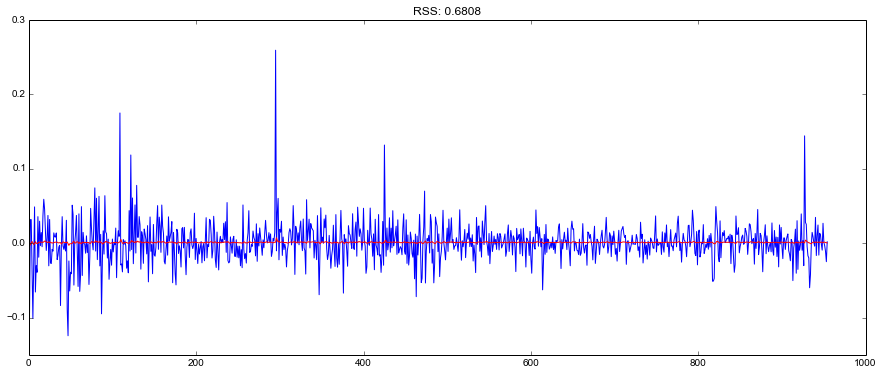

In [154]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Here, we fit an ARIMA model of order (0, 1, 2) to a logarithmically transformed time series, ts_log, and visualize the model's fitted values and the original differenced series.

An ARIMA model object with an order of (0, 1, 2) can be created by the line model = ARIMA(ts_log, order=(0, 1, 2)). I(1) represents a differenced series that has been fitted with a moving average of order 2 (MA(2)).

The line results_MA = model.fit(disp=-1) then fits the ARIMA model to the logarithmically transformed time series. It returns the fitted model results, including the moving average coefficients, based on the model parameters estimated by the fit() method.

The next line plots the original differenced series using plt.plot(ts_log_diff).

The fitted values from the ARIMA model are then plotted using plt.plot(results_MA.fittedvalues, color='red'). Model parameters and original time series values are used to predict these values.

Plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2)) sets the plot's title to display the residual sum of squares (RSS), which quantifies the difference between the fitted values and the original differenced series.

Using this code, we will evaluate how well the ARIMA model of order (0, 1, 2) fits the original differenced series. With the plot, you can compare the fit values with the differenced series, and with the RSS, you can gauge the model's overall goodness of fit.

As a summary, this code fits an ARIMA model of order (0, 1, 2) to a logarithmically transformed time series, plots the original differenced series, the model's fitted values, and displays the RSS as an indicator of the model's fit.

### ARIMA Model:

/usr/local/lib/python2.7/dist-packages/statsmodels-0.8.0-py2.7-linux-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


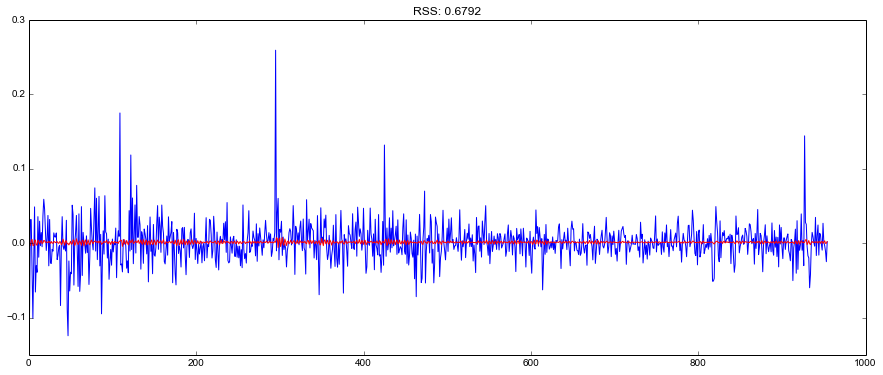

In [155]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

An ARIMA model of order (2, 1, 2) is fitted to a logarithmically transformed time series, ts_log, and the fitted values are visualized alongside the original differenced series.

A line model = ARIMA(ts_log, order=(2, 1, 2)) creates an ARIMA model object with an order of (2, 1, 2). ARIMA is an autoregressive integrated moving average (ARIMA) model with an autoregressive component of order 2 (AR(2)), a differencing component of order 1 (I(1)), and a moving average component of order 2 (MA(2)).

The line results_ARIMA = model.fit(disp=-1) fits the ARIMA model to the logarithmically transformed time series. Fit() estimates model parameters, including the autoregressive and moving average coefficients, and returns the fitted model.

The line plt.plot(ts_log_diff) plots the original differenced series.

After that, plt.plot(results_ARIMA.fittedvalues, color='red') plots the fitted values. Using the parameters of the model and the original time series, these are the predicted values.

Plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2)) sets the plot's title to display the root squared sum of squares (RSS), which quantifies the difference between the fitted values and the original differenced series.

The purpose of this code is to assess how well the ARIMA model of order (2, 1, 2) fits the original differenced time series. In addition to allowing visual comparison between fitted values and the actual differenced series, RSS measures the model's overall fit.

In summary, this code fits an ARIMA model of order (2, 1, 2) to a logarithmically transformed time series, plots the original differenced series, the model's fitted values, and displays RSS (root squared sum of squares).

### Convert to original scale:

In [156]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2012-05-21    0.001251
2012-05-22   -0.001721
2012-05-23   -0.003020
2012-05-24    0.003921
2012-05-25    0.005018
dtype: float64


In this code snippet, the fitted values obtained from an ARIMA model are stored in a pandas Series object called predictions_ARIMA_diff, and then the first few values of this series are printed.

A new Series object named predictions_ARIMA_diff is created by the line predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True). ARIMA's fittedvalues attribute contains the predicted values generated by the model.

The line print predictions_ARIMA_diff.head() prints the first few values in the predictions_ARIMA_diff series. From the beginning of a series or dataframe, the head() function retrieves the default number of rows (5 rows by default).

The intention is to examine the initial values of the ARIMA predictions by storing the fitted values in a separate series.

This code creates a pandas Series object to store the fitted values of an ARIMA model, and prints the first few values of this series.

In [157]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2012-05-21    0.001251
2012-05-22   -0.000471
2012-05-23   -0.003491
2012-05-24    0.000431
2012-05-25    0.005448
dtype: float64


To store the cumulative sum of the previously fitted values from the ARIMA model, this code snippet creates a new pandas Series called predictions_ARIMA_diff_cumsum. This series of cumulative sums is then displayed for the first few values.

Predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() calculates the cumulative sum of predictions_ARIMA_diff. Predictions_ARIMA_diff_cumsum represents the sum of all previous predictions_ARIMA_diff values.

Next, the line print predictions_ARIMA_diff_cumsum.head() prints the first few values of predictions_ARIMA_diff_cumsum. From the beginning of a series or dataframe, the head() function retrieves the default number of rows (5 by default).

This code is intended to compute the cumulative sum of the previously obtained fitted values from the ARIMA model and examine their initial values.

Summarizing the fitted values from the ARIMA model, this code calculates a new series from the sum of the fitted values. In order to give an overview of the accumulated changes over time, the first few values of this cumulative sum series are printed.

In [158]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2012-05-18    3.643621
2012-05-21    3.644871
2012-05-22    3.643150
2012-05-23    3.640130
2012-05-24    3.644051
dtype: float64

A new pandas Series named predictions_ARIMA_log is created to store the predicted values of the ARIMA model in logarithmic form. The differenced values are then added to this series, aligned with the corresponding index values of the original series. The final step is to print the first few values of this combined series.

Predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index) creates a Series object named predictions_ARIMA_log. The series is initially initialized with the first value of the original logarithmically transformed time series, ts_log, and assigned the same index values.

Next, predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0) adds the values of predictions_ARIMA_diff_cumsum (the cumulative sum of the differenced values) to predictions_ARIMA_log. The values are aligned using the index, and if any index values are missing in predictions_ARIMA_diff_cumsum, they are filled with 0.

The line predictions_ARIMA_log.head() displays the first few values of the combined predictions_ARIMA_log series.

In this code, the differenced ARIMA predictions are transformed back to the original logarithmic scale by adding the cumulative sum of the differences to the first value of the logarithmically transformed series.

As a result of this code, the predicted values are stored in logarithmic form as a new series. It aligns the differenced values with the original time series by adding the cumulative sum of the differenced values. As a final step, it prints the first few values of the combined series so that the original predictions can be observed.

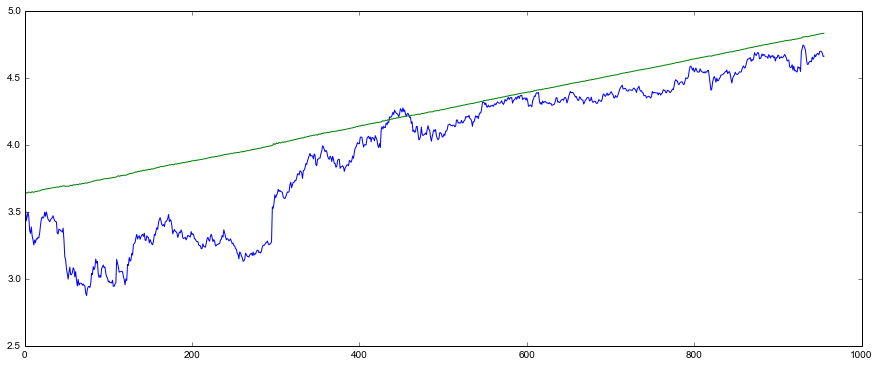

In [159]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

This code snippet plots the logarithmically transformed time series, ts_log, and the predicted values obtained from the ARIMA model, predictions_ARIMA_log.

A line plot of the logarithmically transformed time series, ts_log, is created using plt.plot(ts_log). The plot represents the actual values of the series.

After that, plt.plot(predictions_ARIMA_log) adds another line plot to the same plot, representing the predicted values obtained from the ARIMA model. A logarithmic scale is applied to these predicted values.

Through this code, the original time series will be visualized and compared with the ARIMA model's predicted values.

The code plots the original logarithmically transformed time series overlaid with the ARIMA predicted values. The model's predictions can be compared with the actual data in this way.

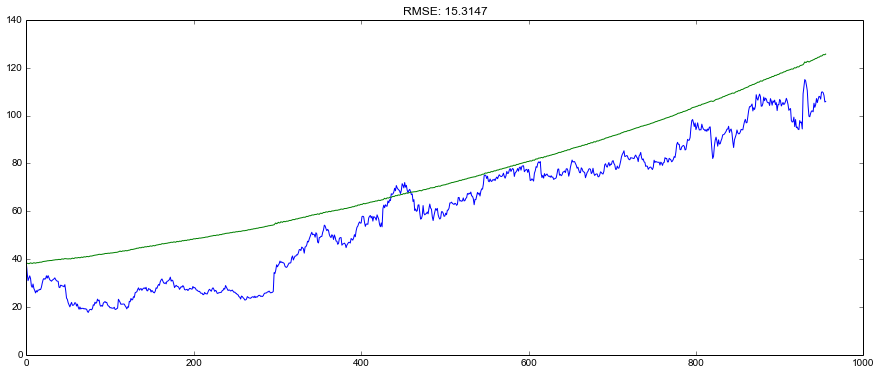

In [160]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Using the exponential function, the predicted values obtained from the ARIMA model, predictions_ARIMA_log, are transformed back to their original scale. Following that, it plots the original time series, ts, and the transformed predicted values, predictions_ARIMA, and calculates and displays the root mean squared error (RMSE).

As a result of np.exp(predictions_ARIMA_log), a new series named predictions_ARIMA is derived from the predictions_ARIMA_log series. By rescaling the predicted values, the original scale is restored.

A line plot of ts is created by line plt.plot(ts). The plot represents the series' actual values.

Next, plt.plot(predictions_ARIMA) adds an additional line plot, predictions_ARIMA, to represent the transformed predicted values.

This line sets the plot's title to display the root mean squared error (RMSE) between the original time series, ts, and the transformed predicted values, predictions_ARIMA. Model accuracy is measured by the RMSE, which is the average difference between predicted and actual values.

By using this code, the original time series is visualized and compared with the predicted values obtained from the ARIMA model. A prediction accuracy assessment is also provided by calculating the RMSE and displaying it.

It plots the original time series along with the transformed predictions, calculates and displays the RMSE between the two series to determine the accuracy of prediction.